<h1> Assunzioni globe </h1>

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

### Carico il dataset con le metriche di dispersione

In [25]:
ad_data = pd.read_excel('C:\\Users\\saver\\PycharmProjects\\Community_smell\\lone_wolf\\lone_wolf_metrics_globe.xlsx')

In [26]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row_id           192 non-null    int64  
 1   totalcommits     192 non-null    int64  
 2   project_id       192 non-null    int64  
 3   owner_login      192 non-null    object 
 4   language         192 non-null    object 
 5   created_at       192 non-null    object 
 6   windows          192 non-null    int64  
 7   window_idx       192 non-null    int64  
 8   name             192 non-null    object 
 9   team             192 non-null    object 
 10  genders          192 non-null    object 
 11  countries        192 non-null    object 
 12  blauGender       192 non-null    float64
 13  turnover         192 non-null    float64
 14  lone             192 non-null    int64  
 15  tenureMedian     192 non-null    int64  
 16  tenureDiversity  192 non-null    int64  
 17  expertise       

In [27]:
ad_data.describe()

row_id   totalcommits    project_id     windows  window_idx  \
count     192.000000     192.000000  1.920000e+02  192.000000  192.000000   
mean   530378.265625   29342.760417  1.959214e+05   15.427083   10.286458   
std    267195.230745   36325.849493  7.671104e+05    6.502106    6.144527   
min     15064.000000     101.000000  1.000000e+01    2.000000    1.000000   
25%    211238.750000    4905.000000  1.226000e+03   11.500000    5.000000   
50%    559538.500000   16883.000000  3.231000e+03   15.000000   10.000000   
75%    778484.250000   25212.000000  1.491500e+04   24.000000   15.000000   
max    995109.000000  118673.000000  6.544729e+06   24.000000   24.000000   

       blauGender    turnover        lone  tenureMedian  tenureDiversity  ...  \
count  192.000000  192.000000  192.000000     192.00000        192.00000  ...   
mean     0.114130    0.412667    8.187500       2.56250          4.06250  ...   
std      0.092148    0.235172    4.801423       1.81219          2.52656  ...   
min      0.013000    0.004000    0.000000       0.00000          0.00000  ...   
25%      0.056250    0.239750    4.000000       1.00000          2.00000  ...   
50%      0.091000    0.397000    9.000000       2.00000          4.00000  ...   
75%      0.142000    0.515000   12.000000       4.00000          6.00000  ...   
max      0.496000    1.000000   16.000000       5.00000          8.00000  ...   

             CV_6       med_7     devst_7        CV_7       med_8     devst_8  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean     0.062775    4.432502    0.471613    0.105727    3.397801    0.234686   
std      0.020114    0.165080    0.176098    0.038261    0.057676    0.077828   
min      0.000000    4.063529    0.000000    0.000000    3.060000    0.000000   
25%      0.056850    4.336867    0.413028    0.093891    3.366071    0.208207   
50%      0.064012    4.408249    0.505672    0.114437    3.403334    0.242816   
75%      0.073535    4.499646    0.598842    0.133122    3.428637    0.278003   
max      0.125162    4.994324    0.767990    0.163528    3.640000    0.397524   

             CV_8       med_9     devst_9        CV_9  
count  192.000000  192.000000  192.000000  192.000000  
mean     0.069027    4.323857    0.293520    0.068177  
std      0.022869    0.104515    0.089999    0.021243  
min      0.000000    3.963333    0.000000    0.000000  
25%      0.061772    4.279773    0.286327    0.066087  
50%      0.070679    4.332353    0.322746    0.074826  
75%      0.081333    4.370567    0.344457    0.080774  
max      0.115727    4.730000    0.436765    0.101742  

[8 rows x 45 columns]

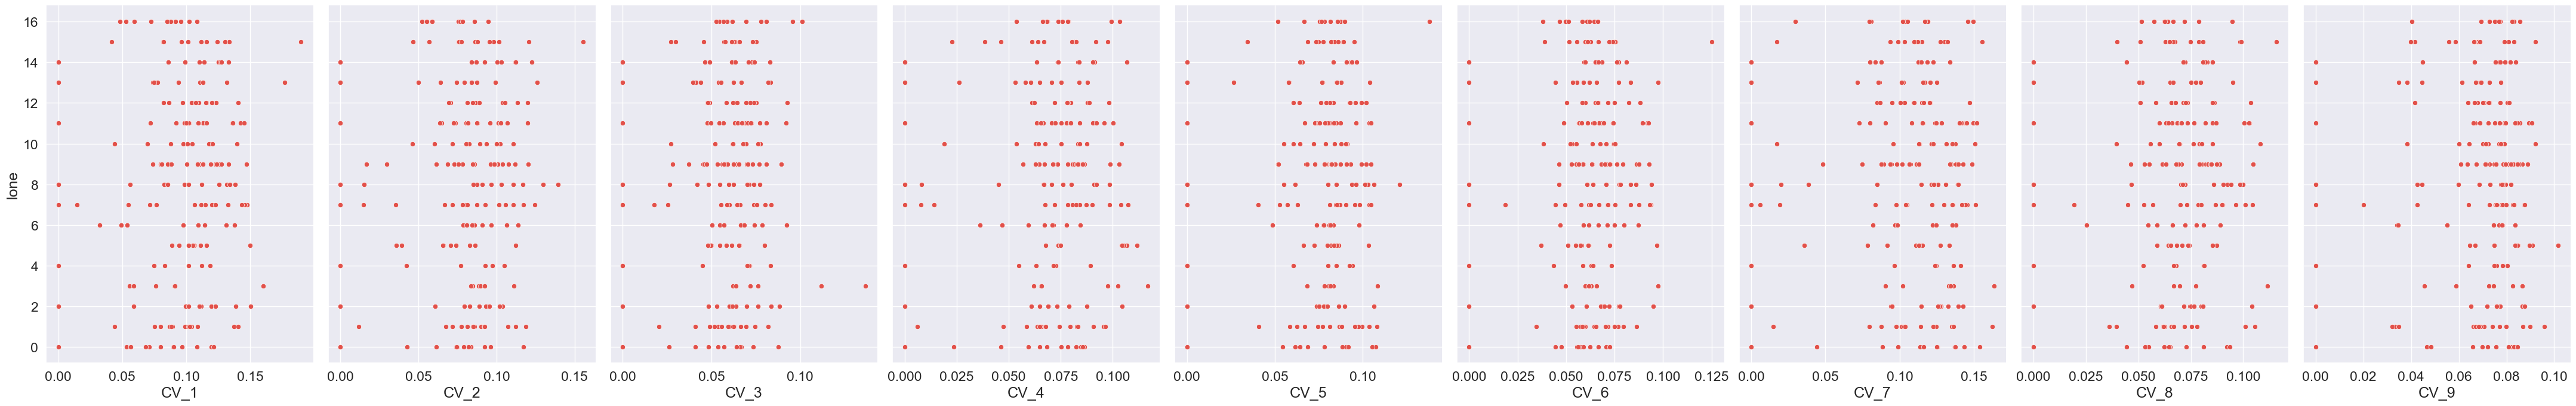

In [28]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9'], y_vars='lone', size=7, aspect=0.7)

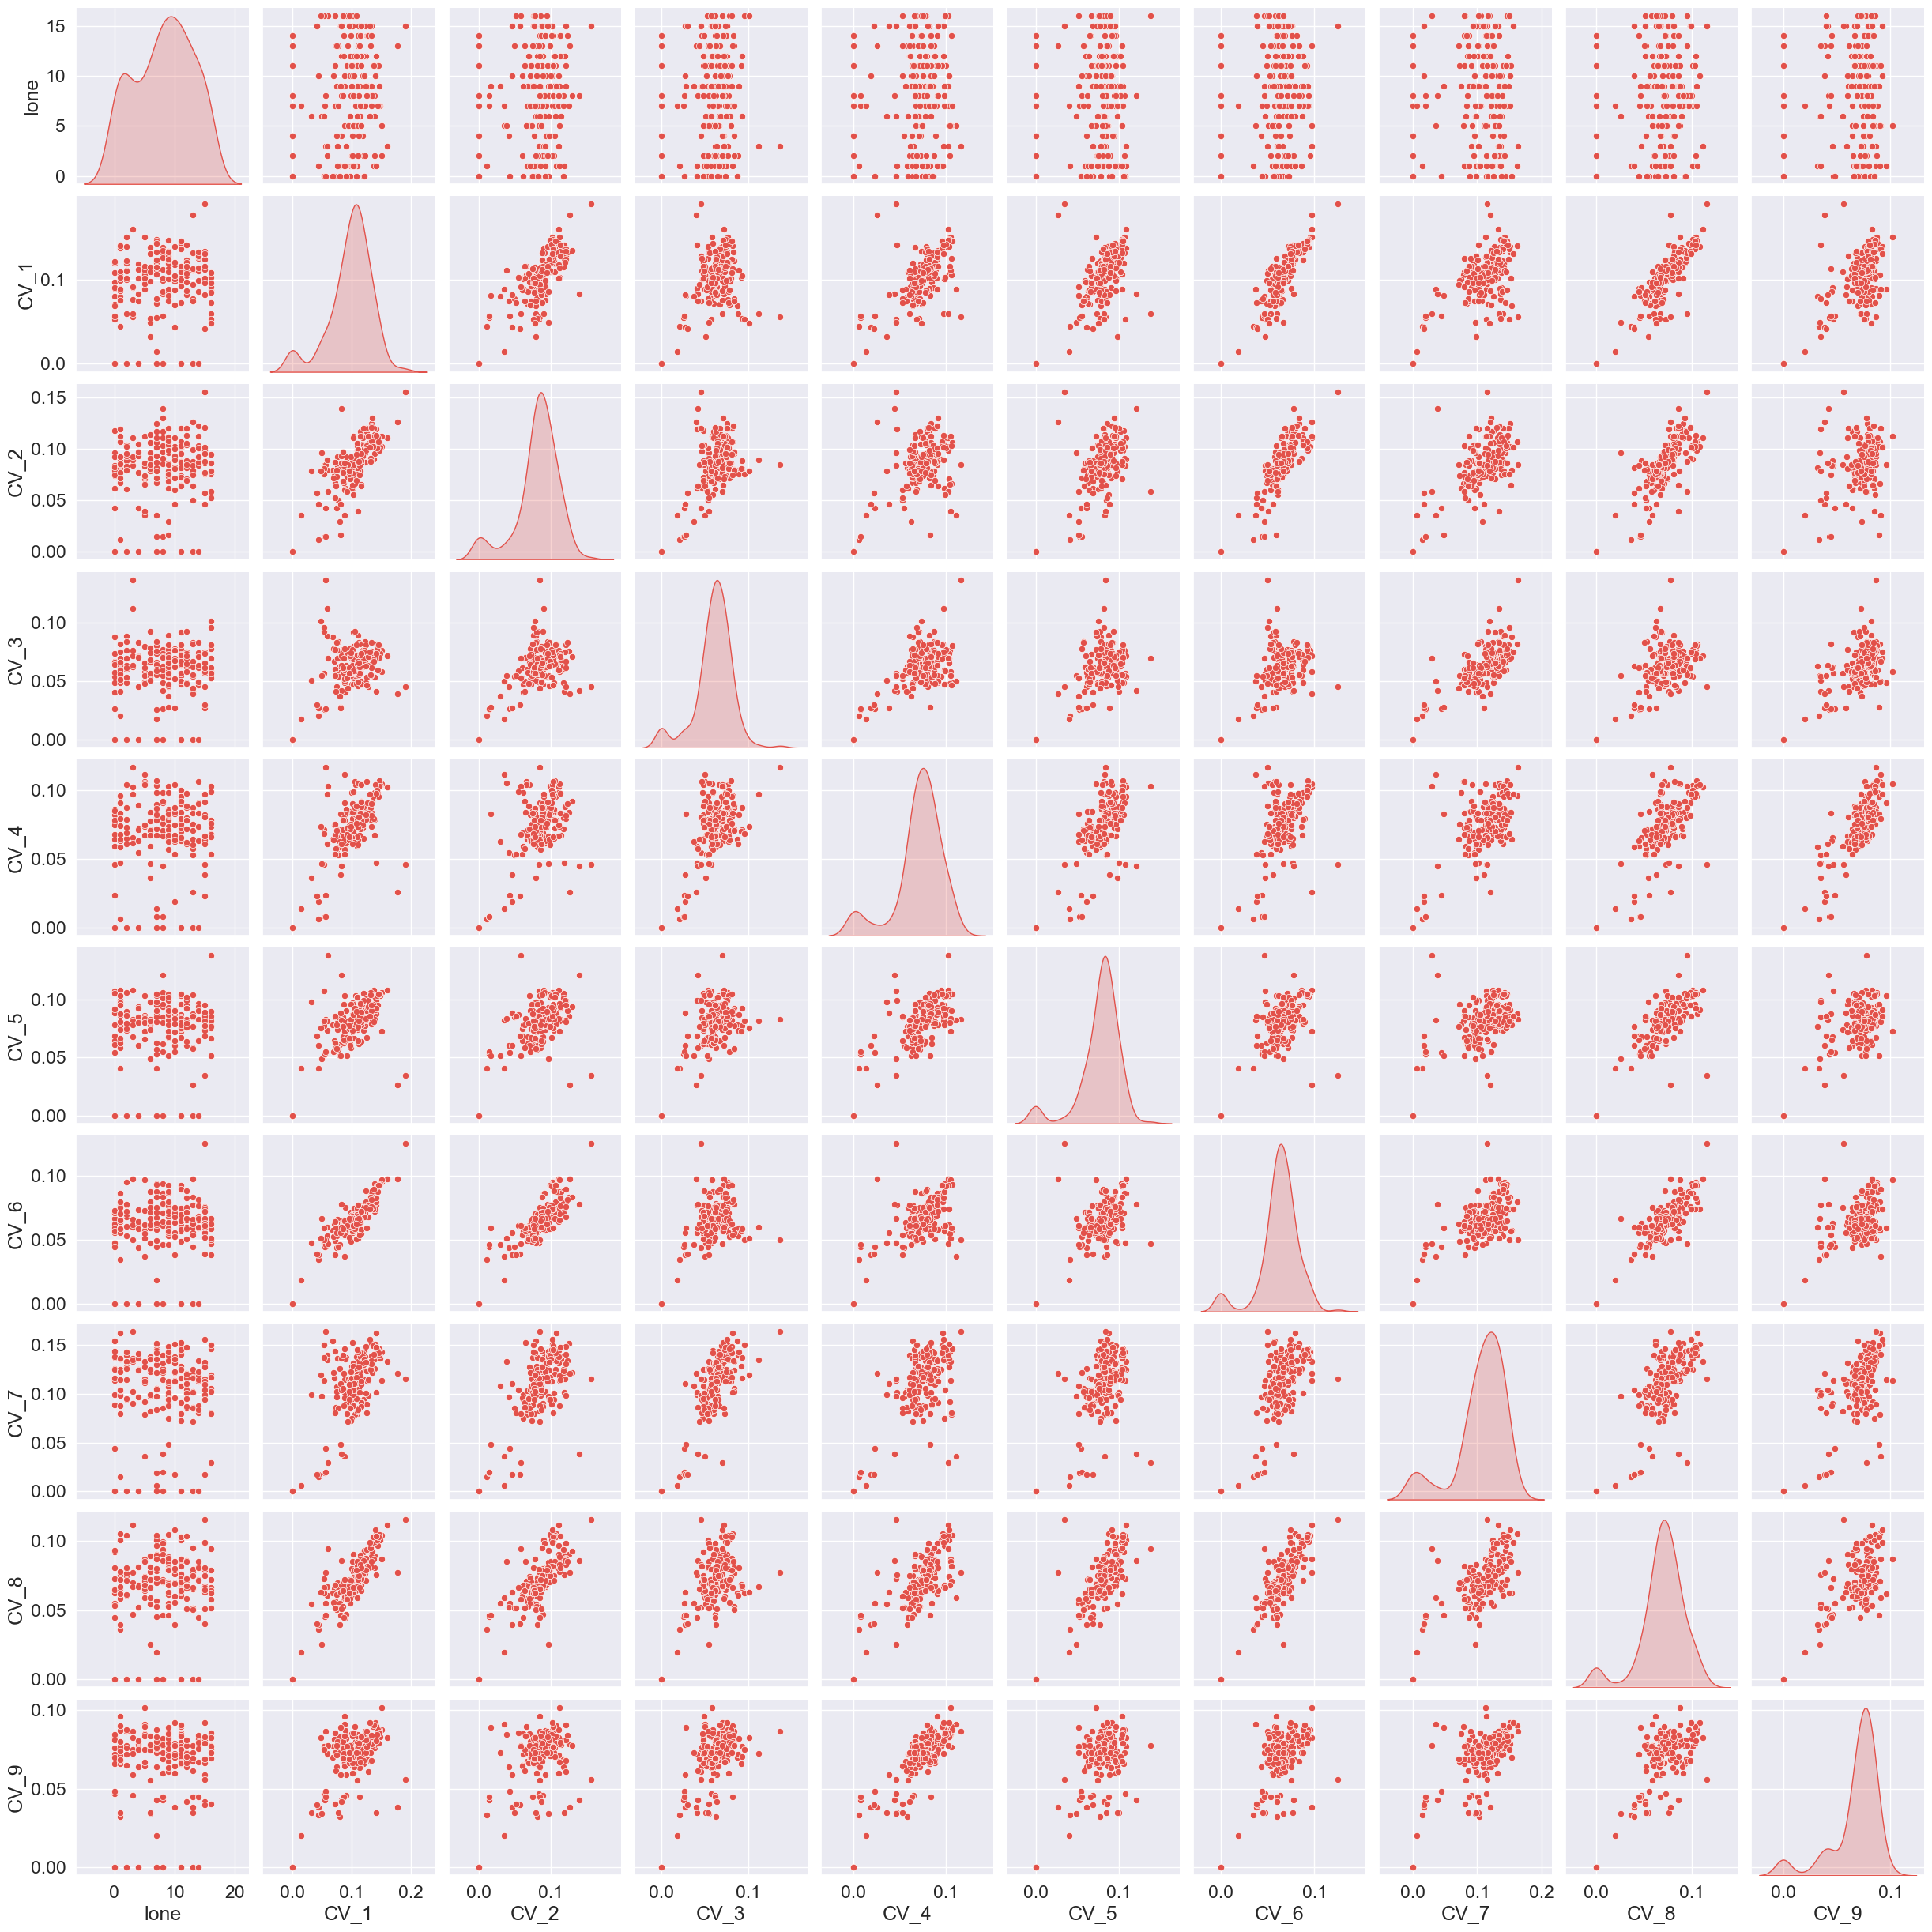

In [29]:
# Specifica la variabile dipendente (Y) e le variabili indipendenti (X)
variabile_dipendente = 'lone'
variabili_indipendenti = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9']

# Crea un dataframe contenente solo le variabili di interesse
df_subset = ad_data[[variabile_dipendente] + variabili_indipendenti]

# Crea una matrice di scatterplot
p=sns.pairplot(df_subset, diag_kind='kde', markers='o')

In [30]:
ad_data = ad_data.dropna(subset=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9', 'lone'])

x = ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9']]
y = ad_data.lone

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [34]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.10700337644432856


In [35]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3.26899001695185e-16


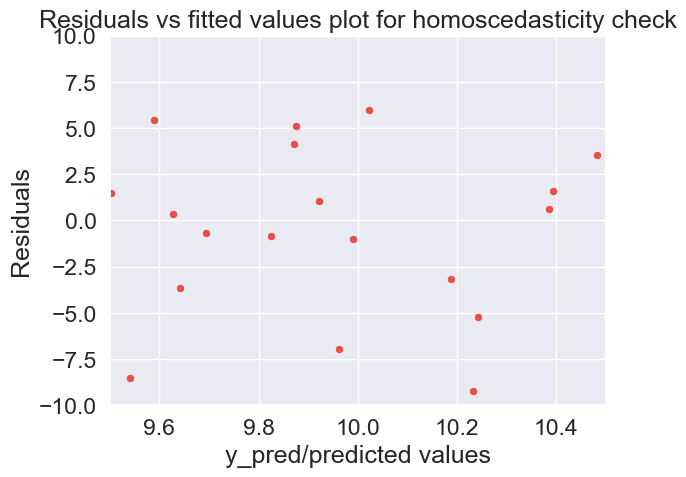

In [36]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(10,10)

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [37]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9416115363944468), ('p-value', 0.5939815009589879)]

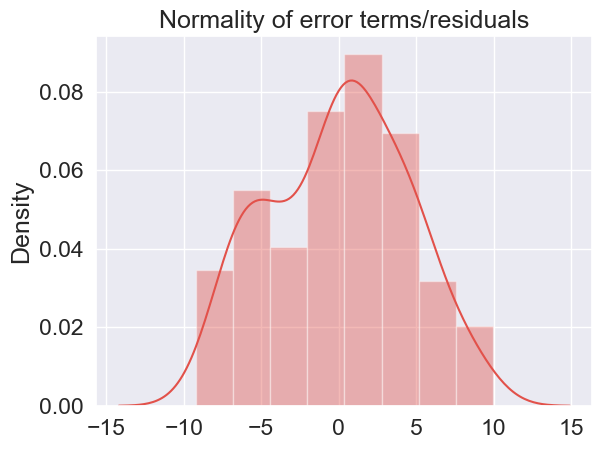

In [38]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

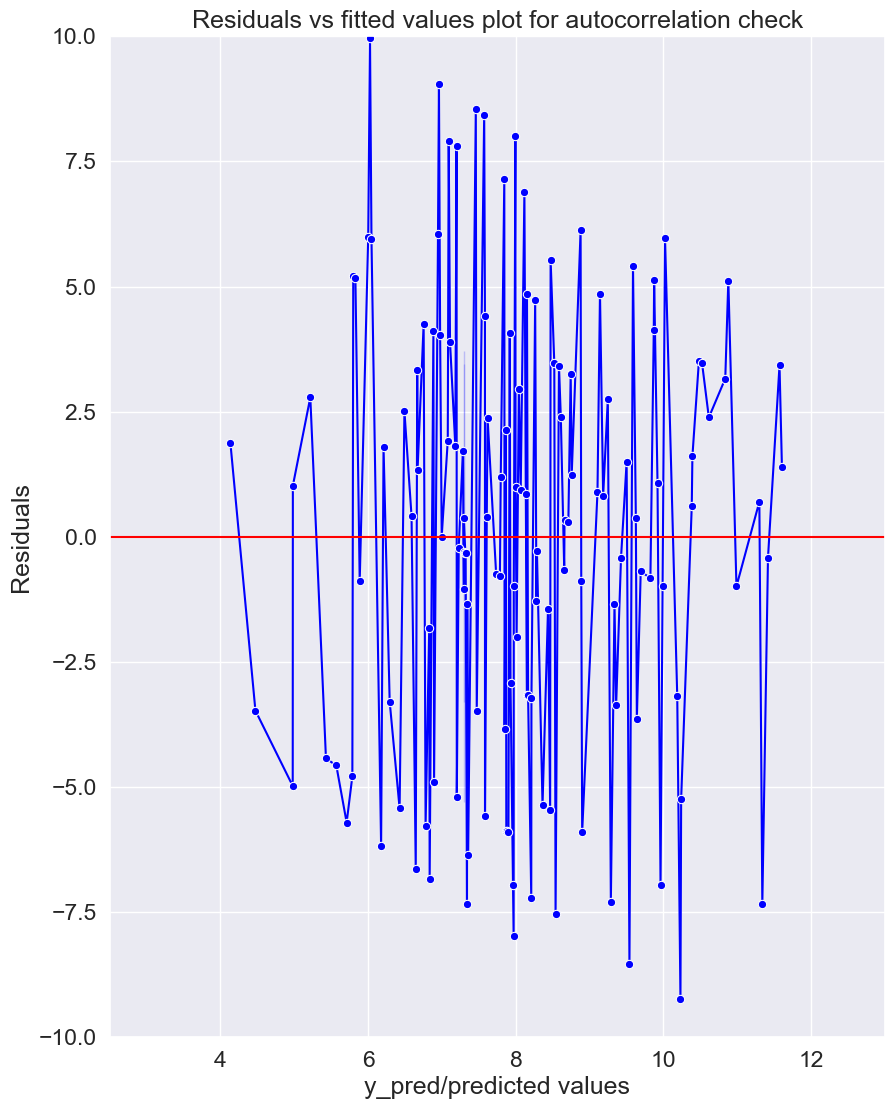

In [39]:
plt.figure(figsize=(10,13))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(2.5,13)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [40]:
import statsmodels.api as sm

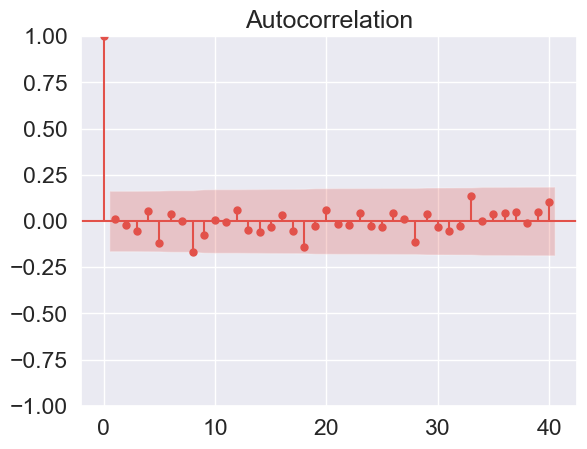

In [41]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

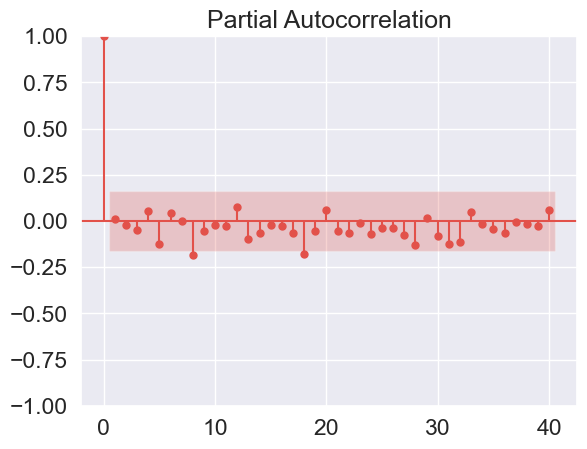

In [42]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

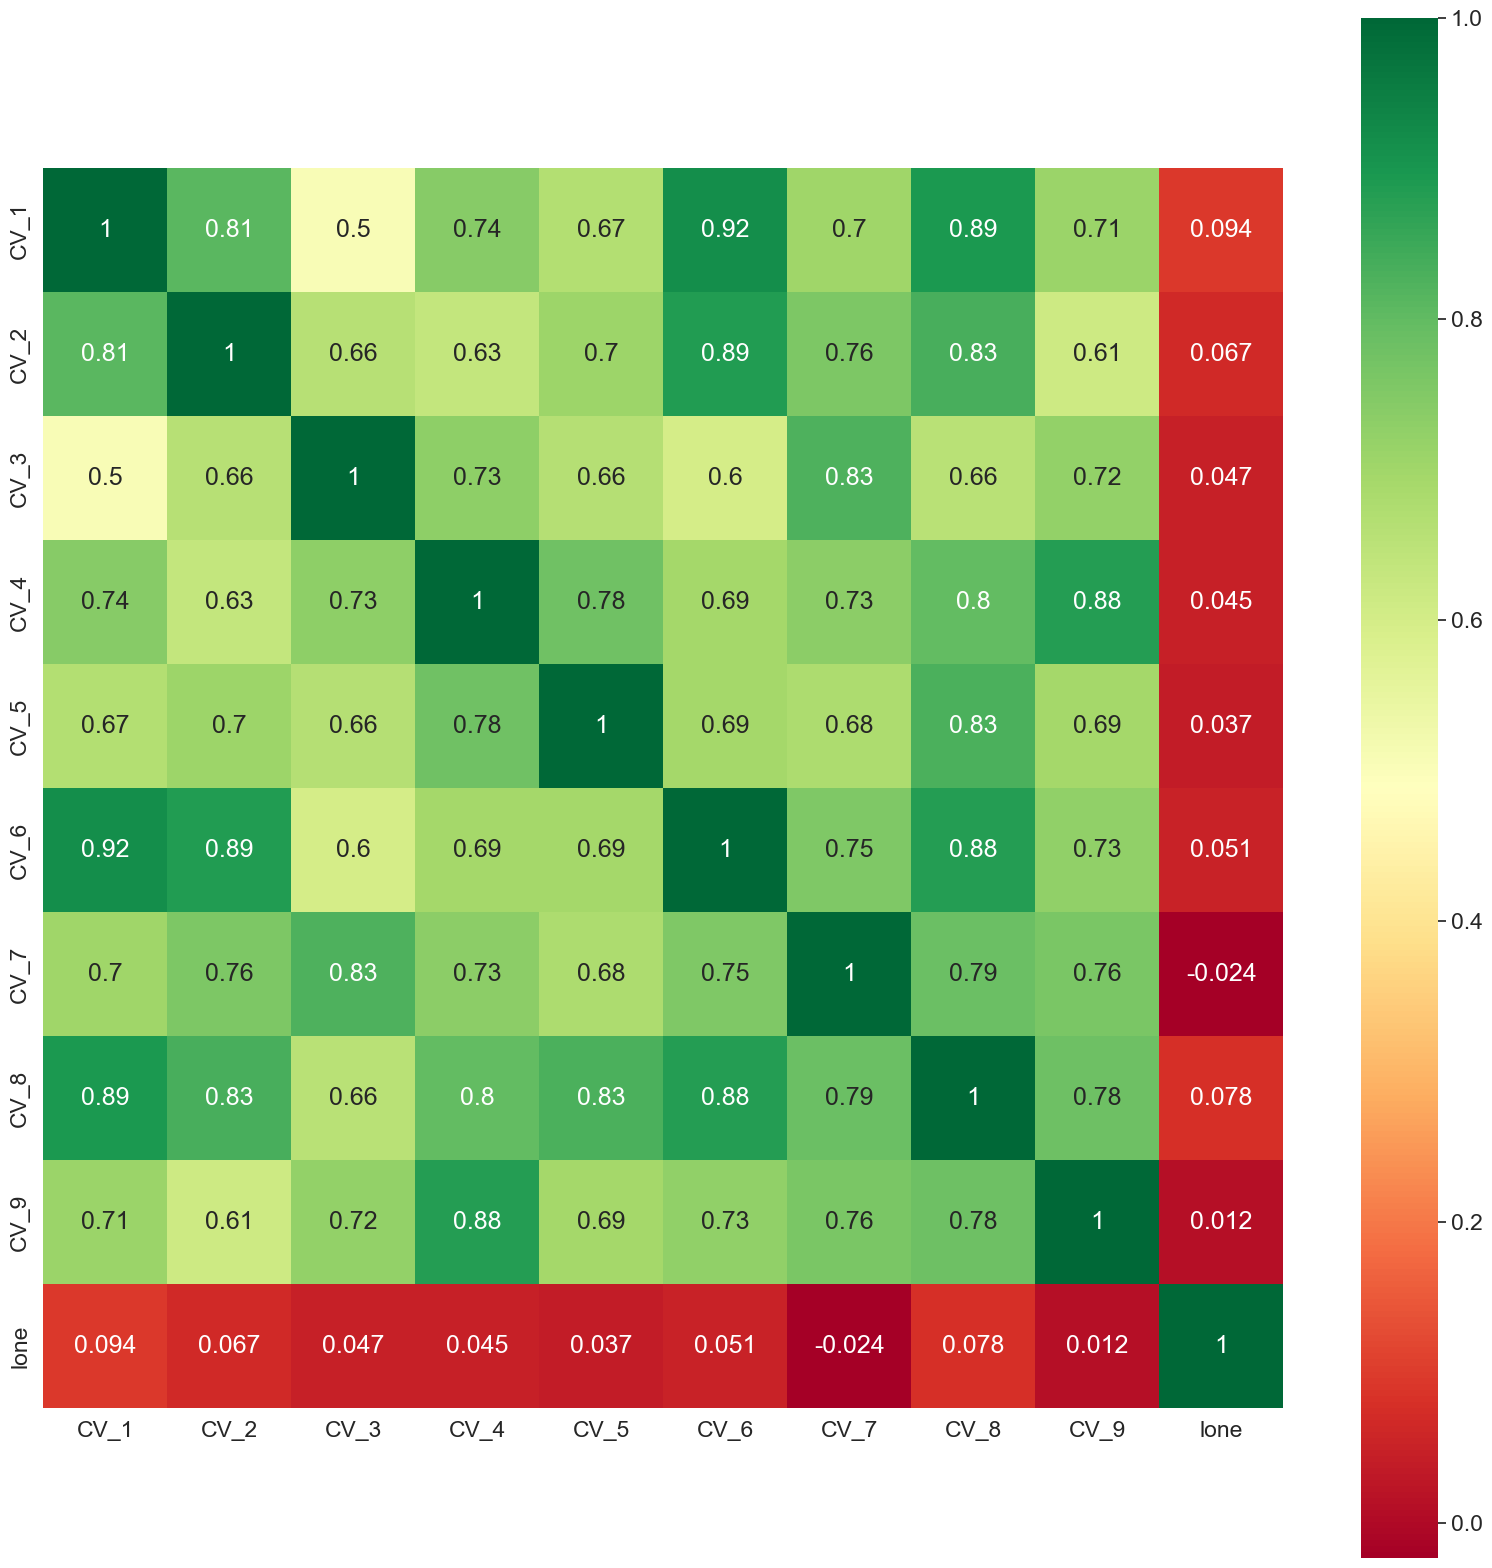

In [43]:
ad_data=ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9','lone']]
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [44]:
# Ora puoi ottenere i coefficienti della regressione
coefficients = regr.coef_
intercept = regr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 2.01733018  1.66374421  2.32837598 -0.27768303 -1.21665898 -2.7408851
 -2.31195282  1.15092064  0.00423842]
Intercept: 7.9616748840860305


<h1>assunzioni hofstede</h1>

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [46]:
ad_data = pd.read_excel('C:\\Users\\saver\\PycharmProjects\\Community_smell\\lone_wolf\\lone_wolf_metrics_hofstede.xlsx')

In [47]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row_id           192 non-null    int64  
 1   totalcommits     192 non-null    int64  
 2   project_id       192 non-null    int64  
 3   owner_login      192 non-null    object 
 4   language         192 non-null    object 
 5   created_at       192 non-null    object 
 6   windows          192 non-null    int64  
 7   window_idx       192 non-null    int64  
 8   name             192 non-null    object 
 9   team             192 non-null    object 
 10  genders          192 non-null    object 
 11  countries        192 non-null    object 
 12  blauGender       192 non-null    float64
 13  turnover         192 non-null    float64
 14  lone             192 non-null    int64  
 15  tenureMedian     192 non-null    int64  
 16  tenureDiversity  192 non-null    int64  
 17  expertise       

In [48]:
ad_data.describe()

row_id   totalcommits    project_id     windows  window_idx  \
count     192.000000     192.000000  1.920000e+02  192.000000  192.000000   
mean   530378.265625   29342.760417  1.959214e+05   15.427083   10.286458   
std    267195.230745   36325.849493  7.671104e+05    6.502106    6.144527   
min     15064.000000     101.000000  1.000000e+01    2.000000    1.000000   
25%    211238.750000    4905.000000  1.226000e+03   11.500000    5.000000   
50%    559538.500000   16883.000000  3.231000e+03   15.000000   10.000000   
75%    778484.250000   25212.000000  1.491500e+04   24.000000   15.000000   
max    995109.000000  118673.000000  6.544729e+06   24.000000   24.000000   

       blauGender    turnover        lone  tenureMedian  tenureDiversity  ...  \
count  192.000000  192.000000  192.000000     192.00000        192.00000  ...   
mean     0.114130    0.412667    8.187500       2.56250          4.06250  ...   
std      0.092148    0.235172    4.801423       1.81219          2.52656  ...   
min      0.013000    0.004000    0.000000       0.00000          0.00000  ...   
25%      0.056250    0.239750    4.000000       1.00000          2.00000  ...   
50%      0.091000    0.397000    9.000000       2.00000          4.00000  ...   
75%      0.142000    0.515000   12.000000       4.00000          6.00000  ...   
max      0.496000    1.000000   16.000000       5.00000          8.00000  ...   

             CV_3     med_uai     dev_uai        CV_4  med_ltowvs  dev_ltowvs  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean     0.228366   56.172800   16.433591    0.291999   43.634860   19.026599   
std      0.093450    6.852881    4.981340    0.083552    8.664962    5.559030   
min      0.000000   41.600000    0.000000    0.000000   26.000000    0.000000   
25%      0.190169   52.168868   15.000344    0.284781   38.469459   17.792318   
50%      0.246587   55.568182   17.733337    0.317628   42.898558   20.082834   
75%      0.302091   58.705000   19.565616    0.337708   47.975000   22.320236   
max      0.369628   86.000000   23.008428    0.386609   83.000000   27.833323   

             CV_5     med_ivr     dev_ivr        CV_6  
count  192.000000  192.000000  192.000000  192.000000  
mean     0.437717   58.632159   13.872905    0.242513  
std      0.122217    5.427982    4.786526    0.093676  
min      0.000000   40.000000    0.000000    0.000000  
25%      0.427448   55.330061   12.792503    0.206940  
50%      0.475632   59.271447   15.003922    0.252376  
75%      0.502045   62.236429   17.039236    0.304621  
max      0.584087   68.400000   21.245888    0.456200  

[8 rows x 36 columns]

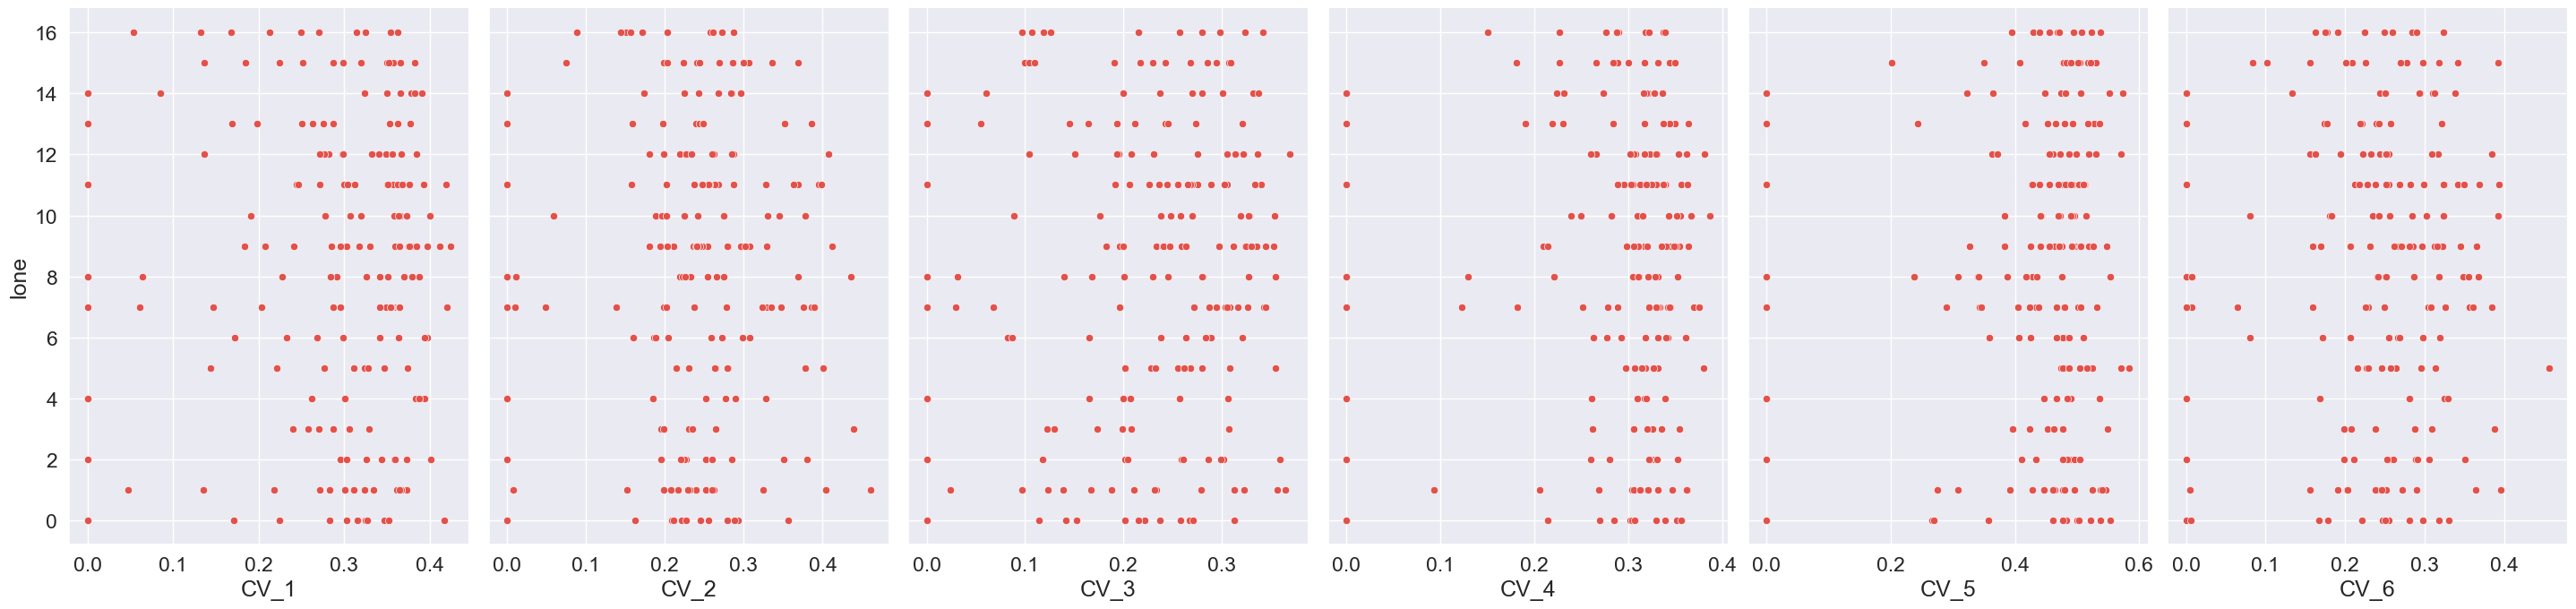

In [49]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6'], y_vars='lone', size=7, aspect=0.7)

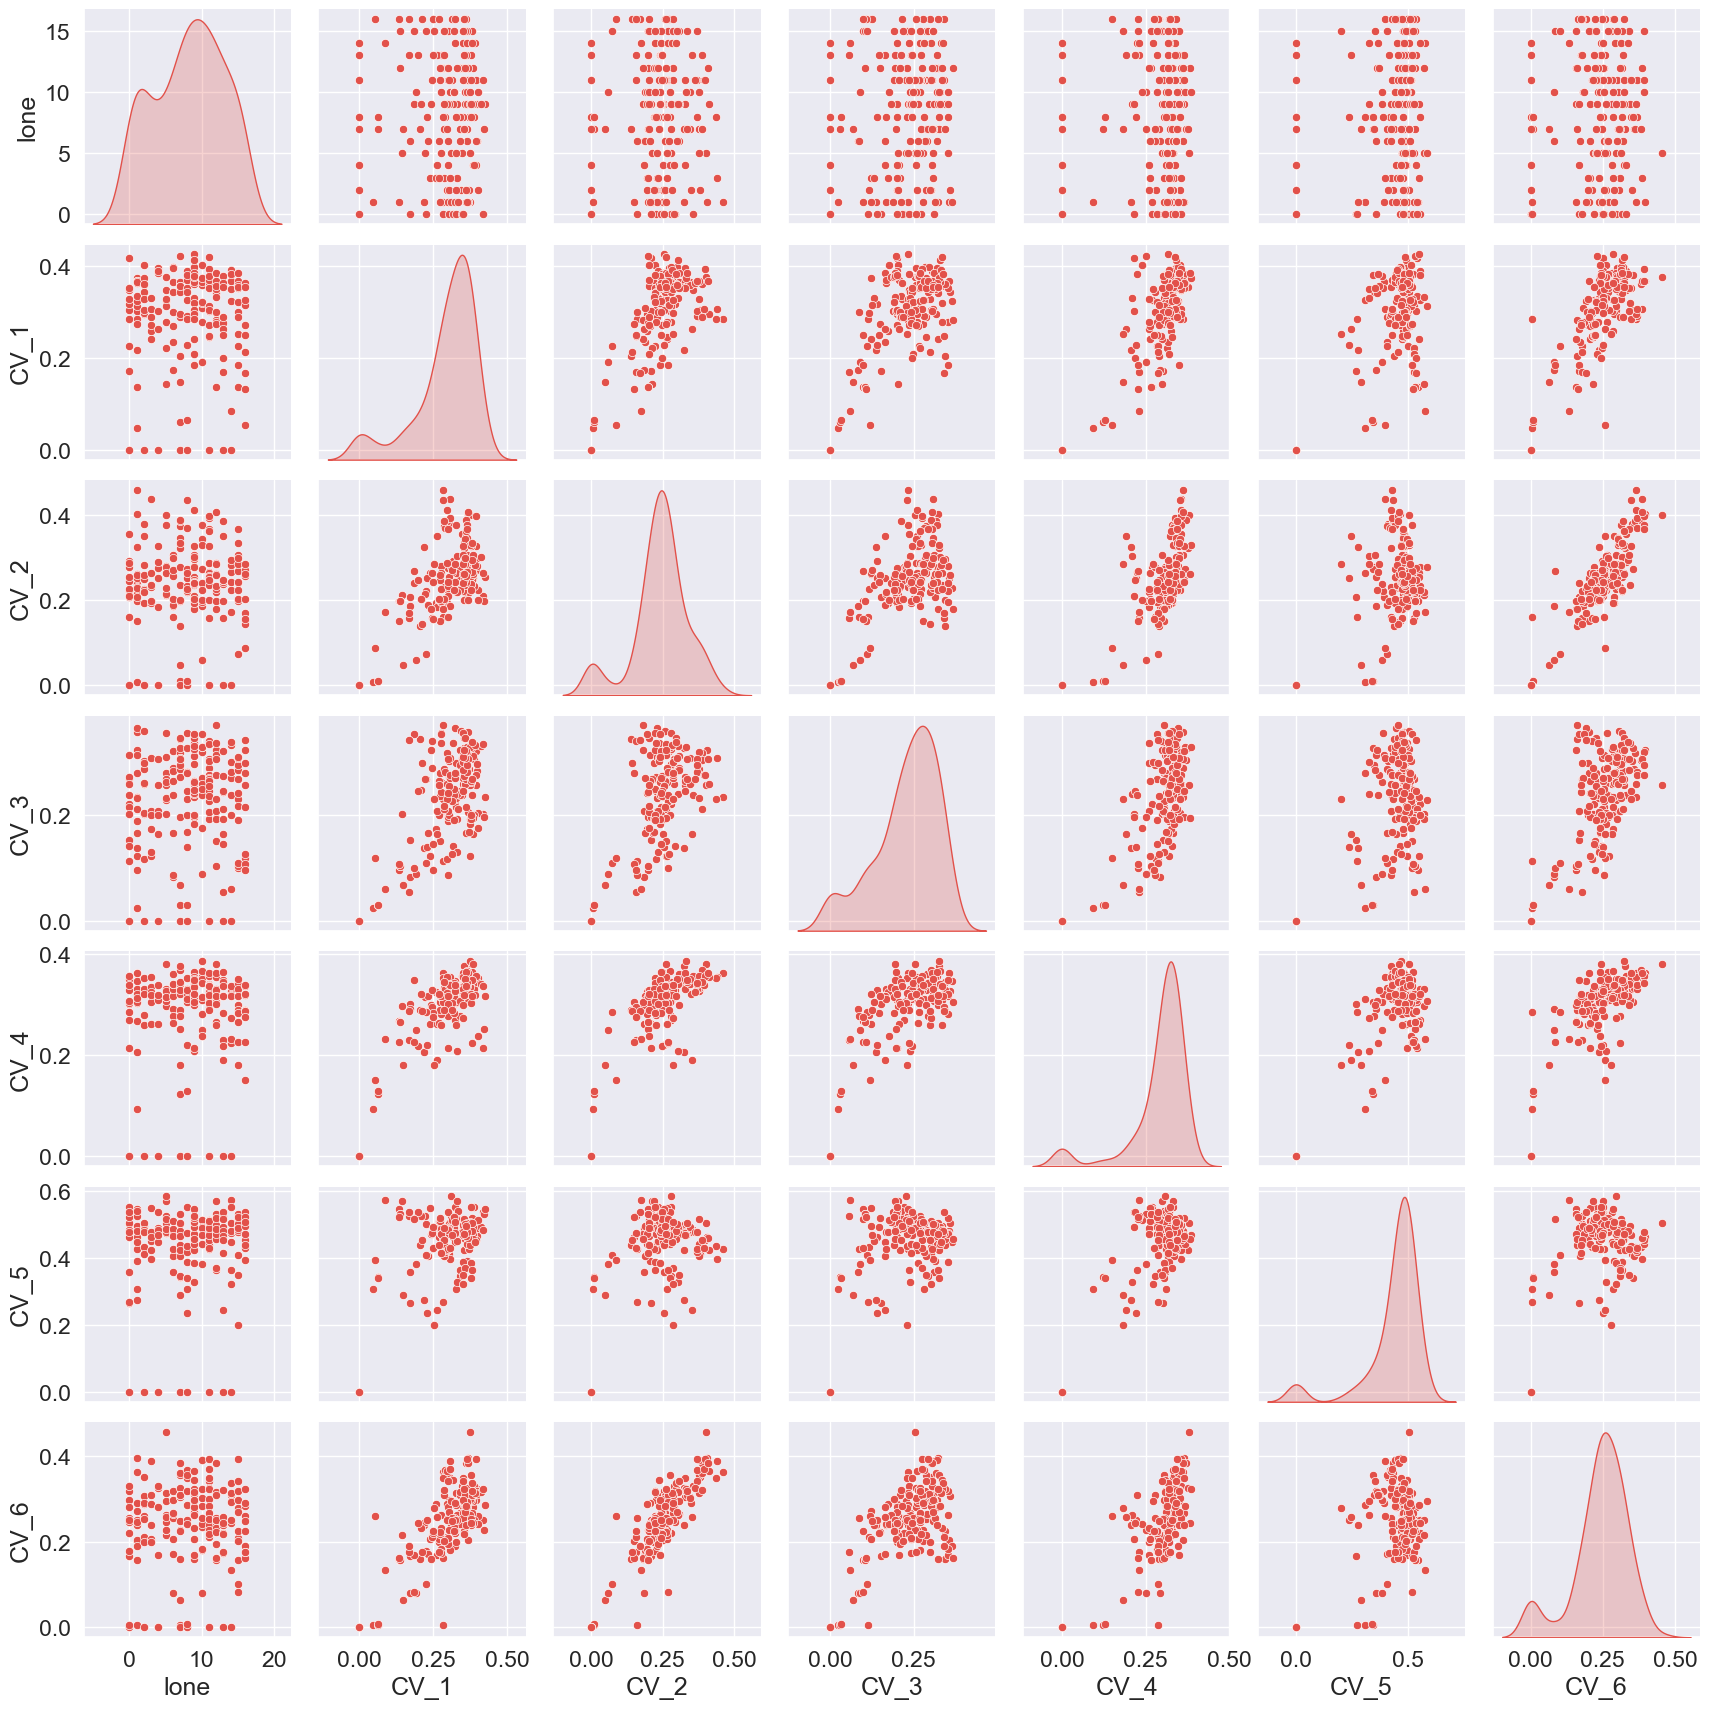

In [50]:
# Specifica la variabile dipendente (Y) e le variabili indipendenti (X)
variabile_dipendente = 'lone'
variabili_indipendenti = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6']

# Crea un dataframe contenente solo le variabili di interesse
df_subset = ad_data[[variabile_dipendente] + variabili_indipendenti]

# Crea una matrice di scatterplot
p=sns.pairplot(df_subset, diag_kind='kde', markers='o')

In [51]:
ad_data = ad_data.dropna(subset=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'lone'])

x = ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6']]
y = ad_data.lone

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [55]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.060977239445302533


In [56]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 5.057682667736824e-16


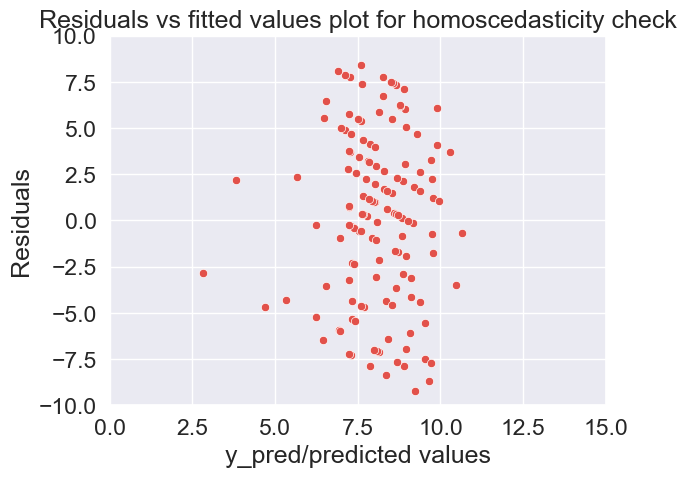

In [59]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,15)

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [60]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0589509856862962), ('p-value', 0.4083575074349757)]

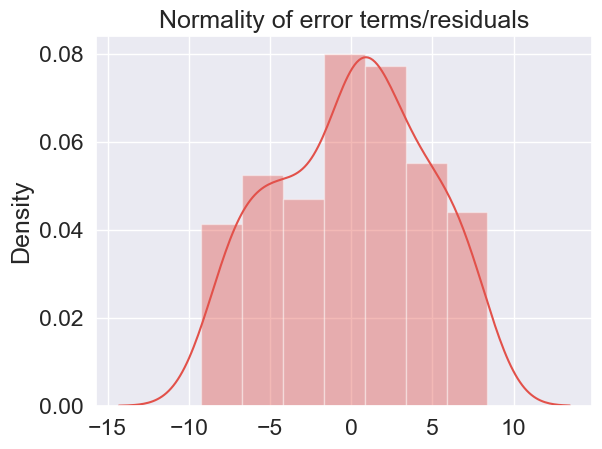

In [61]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

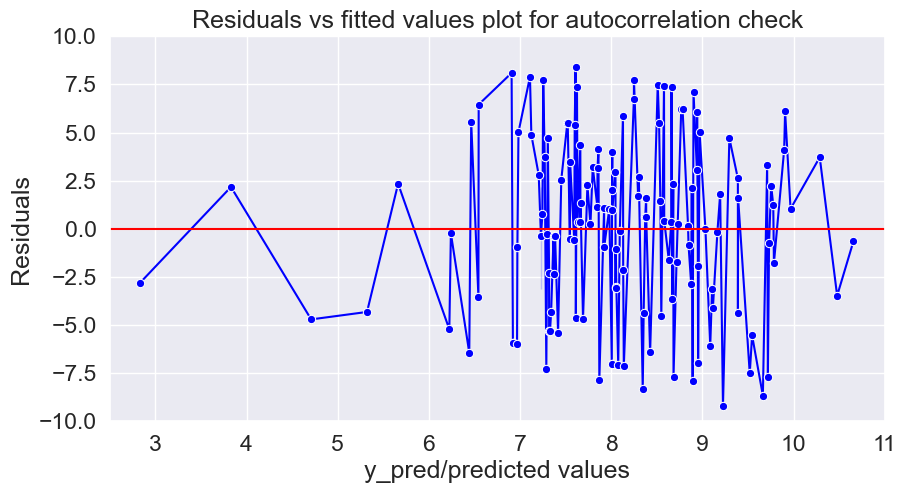

In [64]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(2.5,11)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

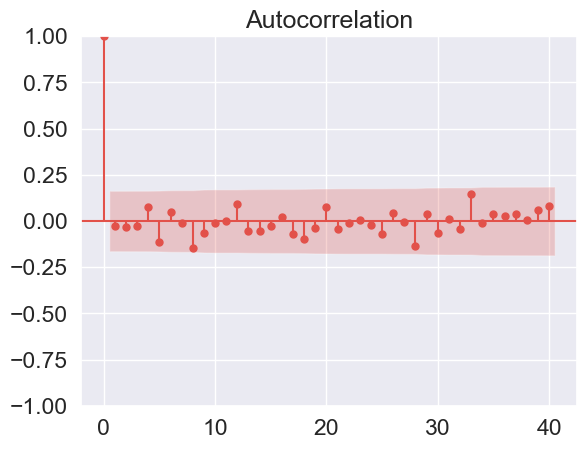

In [82]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

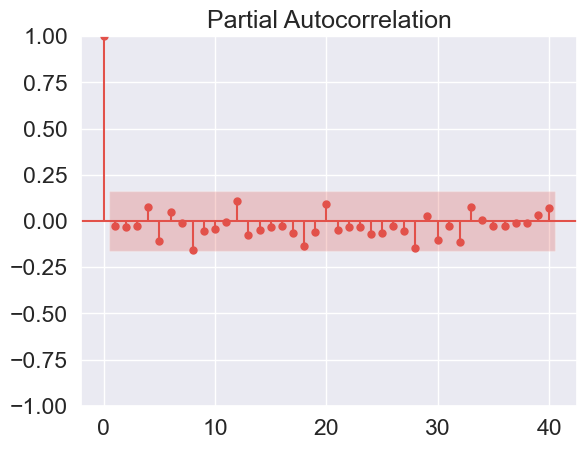

In [83]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

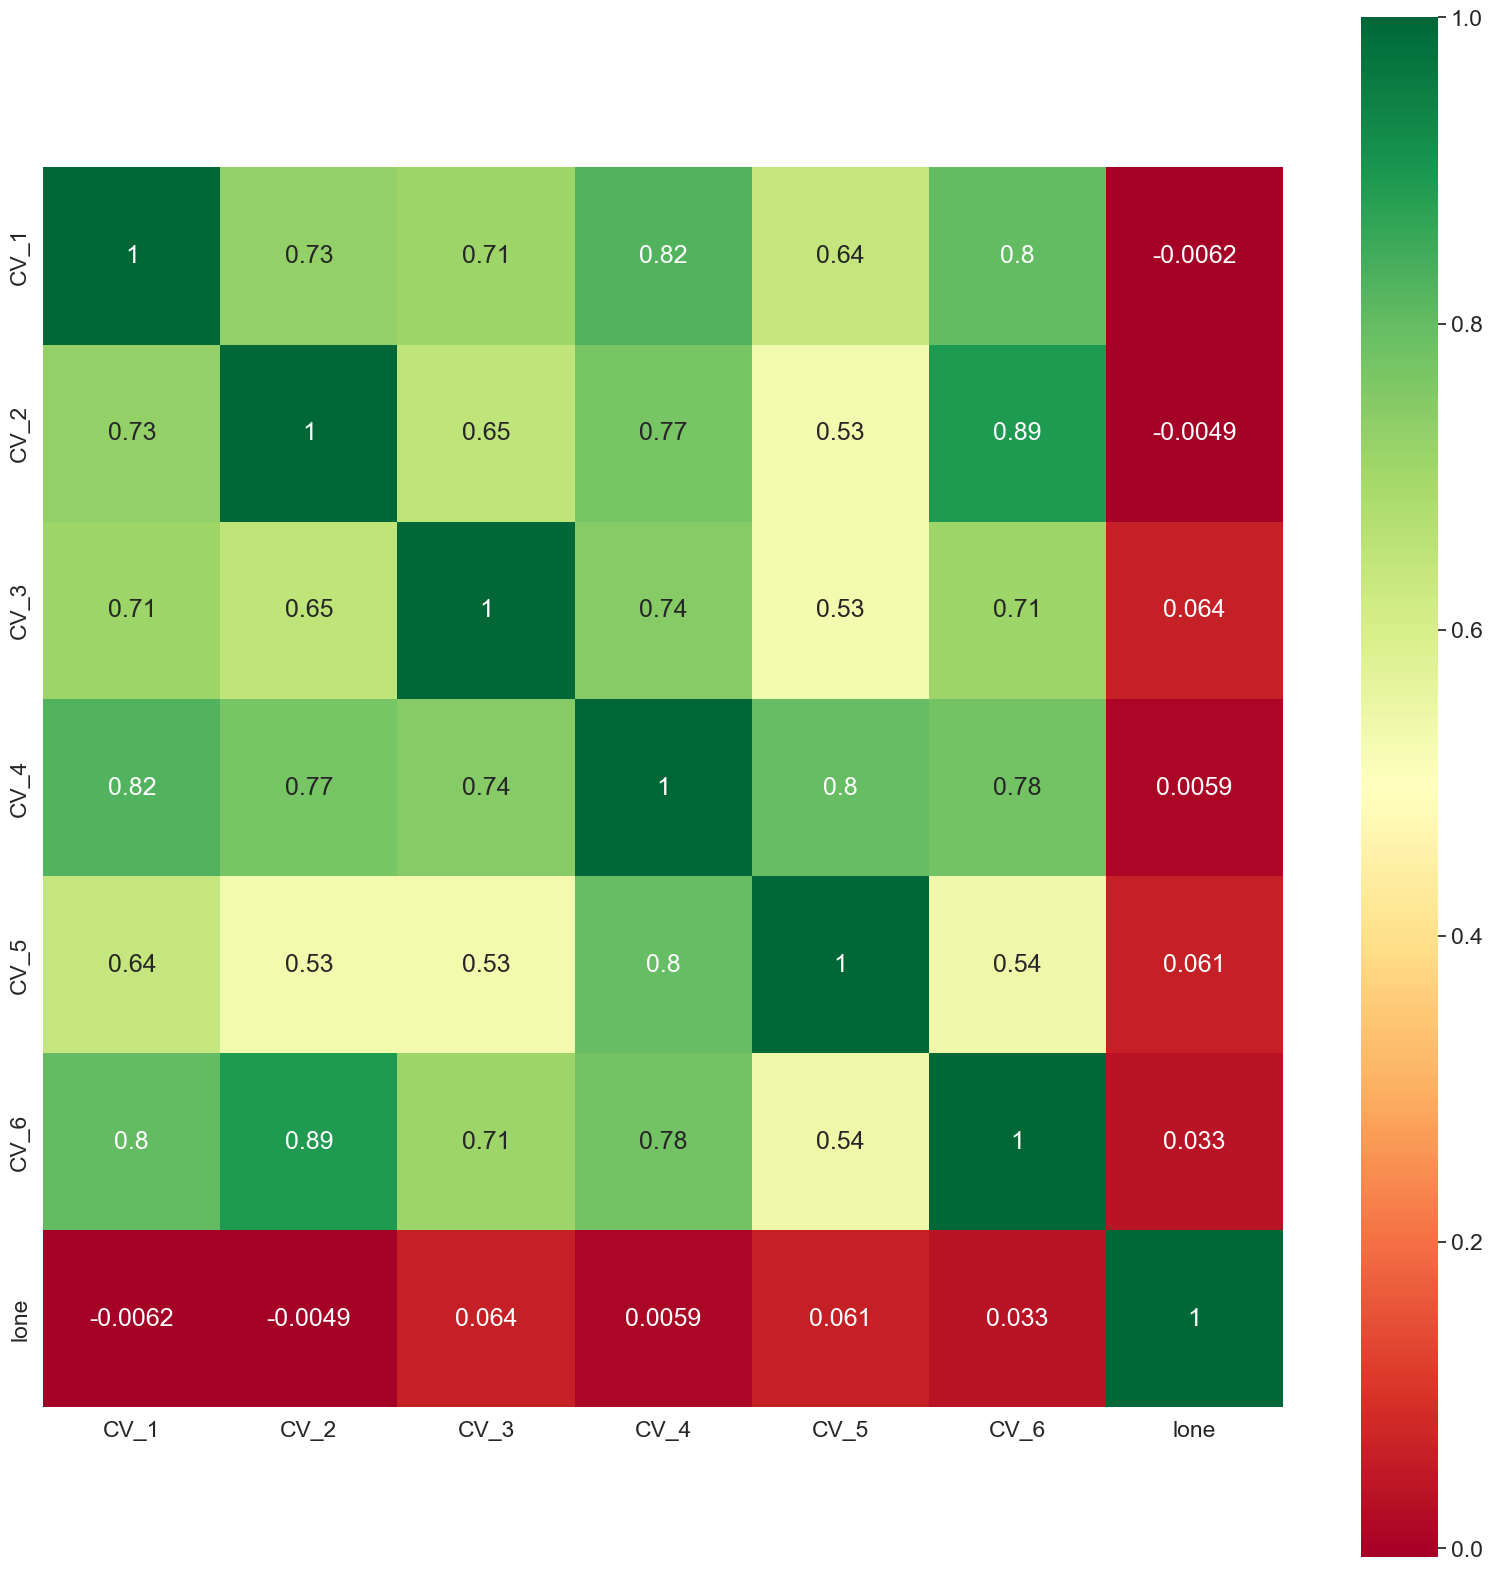

In [84]:
ad_data=ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6','lone']]
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [85]:
# Ora puoi ottenere i coefficienti della regressione
coefficients = regr.coef_
intercept = regr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.49000914 -1.67389247  0.40033642 -1.59725754  0.88961919  1.98641966]
Intercept: 8.070356621416025


<h1>Assunzioni trompenaars</h1>

In [65]:
ad_data = pd.read_excel('C:\\Users\\saver\\PycharmProjects\\Community_smell\\lone_wolf\\lone_wolf_metrics_trompenaars.xlsx')
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          192 non-null    int64  
 1   totalcommits                    192 non-null    int64  
 2   project_id                      192 non-null    int64  
 3   owner_login                     192 non-null    object 
 4   language                        192 non-null    object 
 5   created_at                      192 non-null    object 
 6   windows                         192 non-null    int64  
 7   window_idx                      192 non-null    int64  
 8   name                            192 non-null    object 
 9   team                            192 non-null    object 
 10  genders                         192 non-null    object 
 11  countries                       192 non-null    object 
 12  blauGender                      192 

In [66]:
ad_data.describe()

row_id   totalcommits    project_id     windows  window_idx  \
count     192.000000     192.000000  1.920000e+02  192.000000  192.000000   
mean   530378.265625   29342.760417  1.959214e+05   15.427083   10.286458   
std    267195.230745   36325.849493  7.671104e+05    6.502106    6.144527   
min     15064.000000     101.000000  1.000000e+01    2.000000    1.000000   
25%    211238.750000    4905.000000  1.226000e+03   11.500000    5.000000   
50%    559538.500000   16883.000000  3.231000e+03   15.000000   10.000000   
75%    778484.250000   25212.000000  1.491500e+04   24.000000   15.000000   
max    995109.000000  118673.000000  6.544729e+06   24.000000   24.000000   

       blauGender    turnover        lone  tenureMedian  tenureDiversity  ...  \
count  192.000000  192.000000  192.000000     192.00000        192.00000  ...   
mean     0.114130    0.412667    8.187500       2.56250          4.06250  ...   
std      0.092148    0.235172    4.801423       1.81219          2.52656  ...   
min      0.013000    0.004000    0.000000       0.00000          0.00000  ...   
25%      0.056250    0.239750    4.000000       1.00000          2.00000  ...   
50%      0.091000    0.397000    9.000000       2.00000          4.00000  ...   
75%      0.142000    0.515000   12.000000       4.00000          6.00000  ...   
max      0.496000    1.000000   16.000000       5.00000          8.00000  ...   

             CV_5     med_PPF     dev_PPF        CV_6      med_SS      dev_SS  \
count  192.000000  192.000000  192.000000  192.000000  192.000000  192.000000   
mean     0.332223   25.551688   16.538142    0.653925   67.088750   15.701911   
std      0.130560    7.343871    5.253987    0.183684    5.087585    6.268299   
min      0.000000   13.500000    0.000000    0.000000   45.100000    0.000000   
25%      0.271416   21.208654   14.466513    0.603462   65.311944   12.941432   
50%      0.322953   24.269779   18.189260    0.696191   67.550287   17.164097   
75%      0.407134   28.547297   19.654083    0.762256   69.911805   19.892791   
max      0.578399   55.000000   25.448833    0.886824   93.000000   29.274295   

             CV_7      med_IE      dev_IE        CV_8  
count  192.000000  192.000000  192.000000  192.000000  
mean     0.239336   71.808136   22.839737    0.328905  
std      0.107158    9.928119    6.990906    0.117542  
min      0.000000   37.000000    0.000000    0.000000  
25%      0.184794   65.787669   21.403598    0.291570  
50%      0.253681   71.530586   23.997298    0.344020  
75%      0.305246   77.795833   26.440824    0.380617  
max      0.617927   94.000000   34.409301    0.625019  

[8 rows x 42 columns]

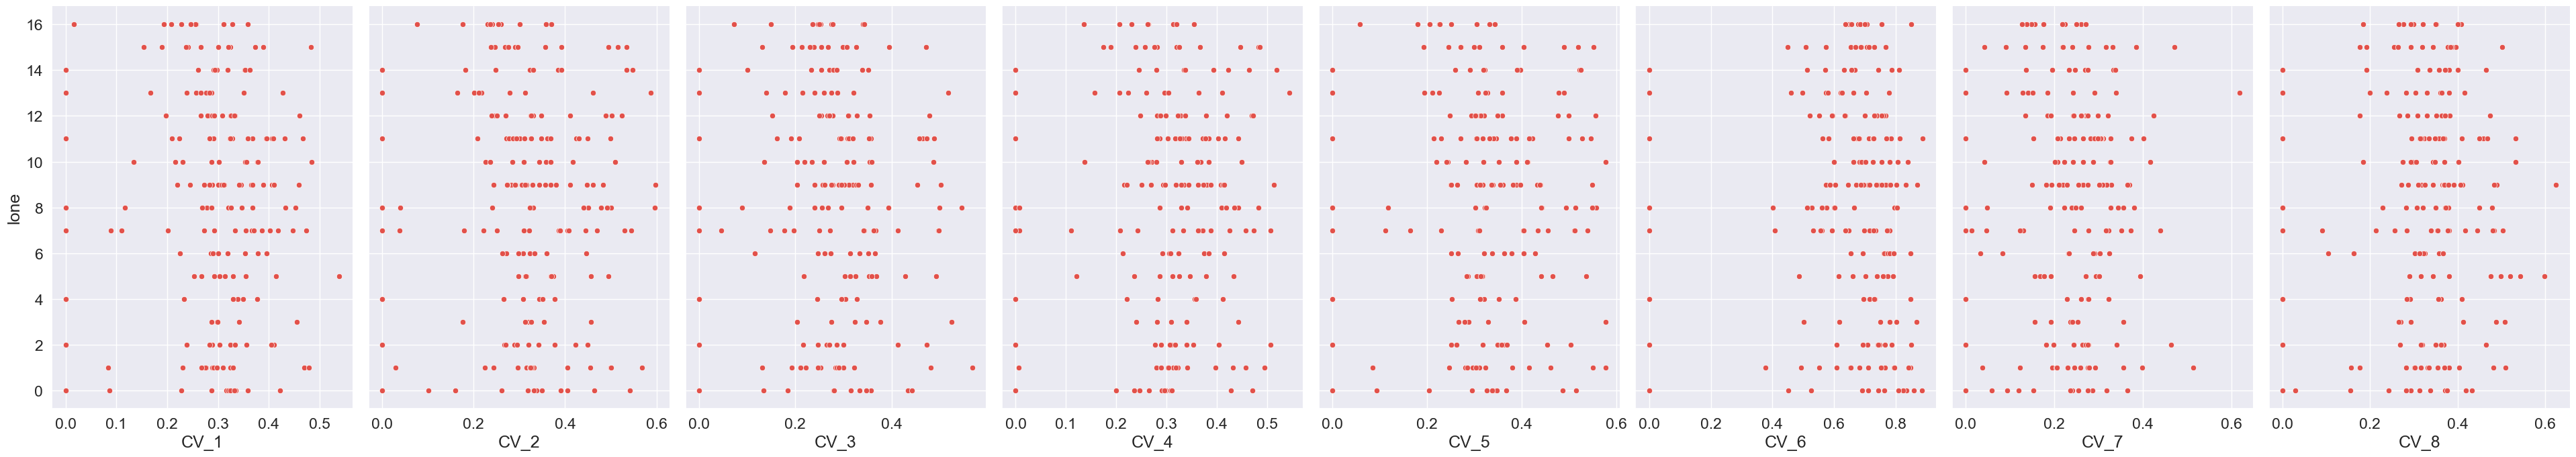

In [67]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8'], y_vars='lone', size=7, aspect=0.7)

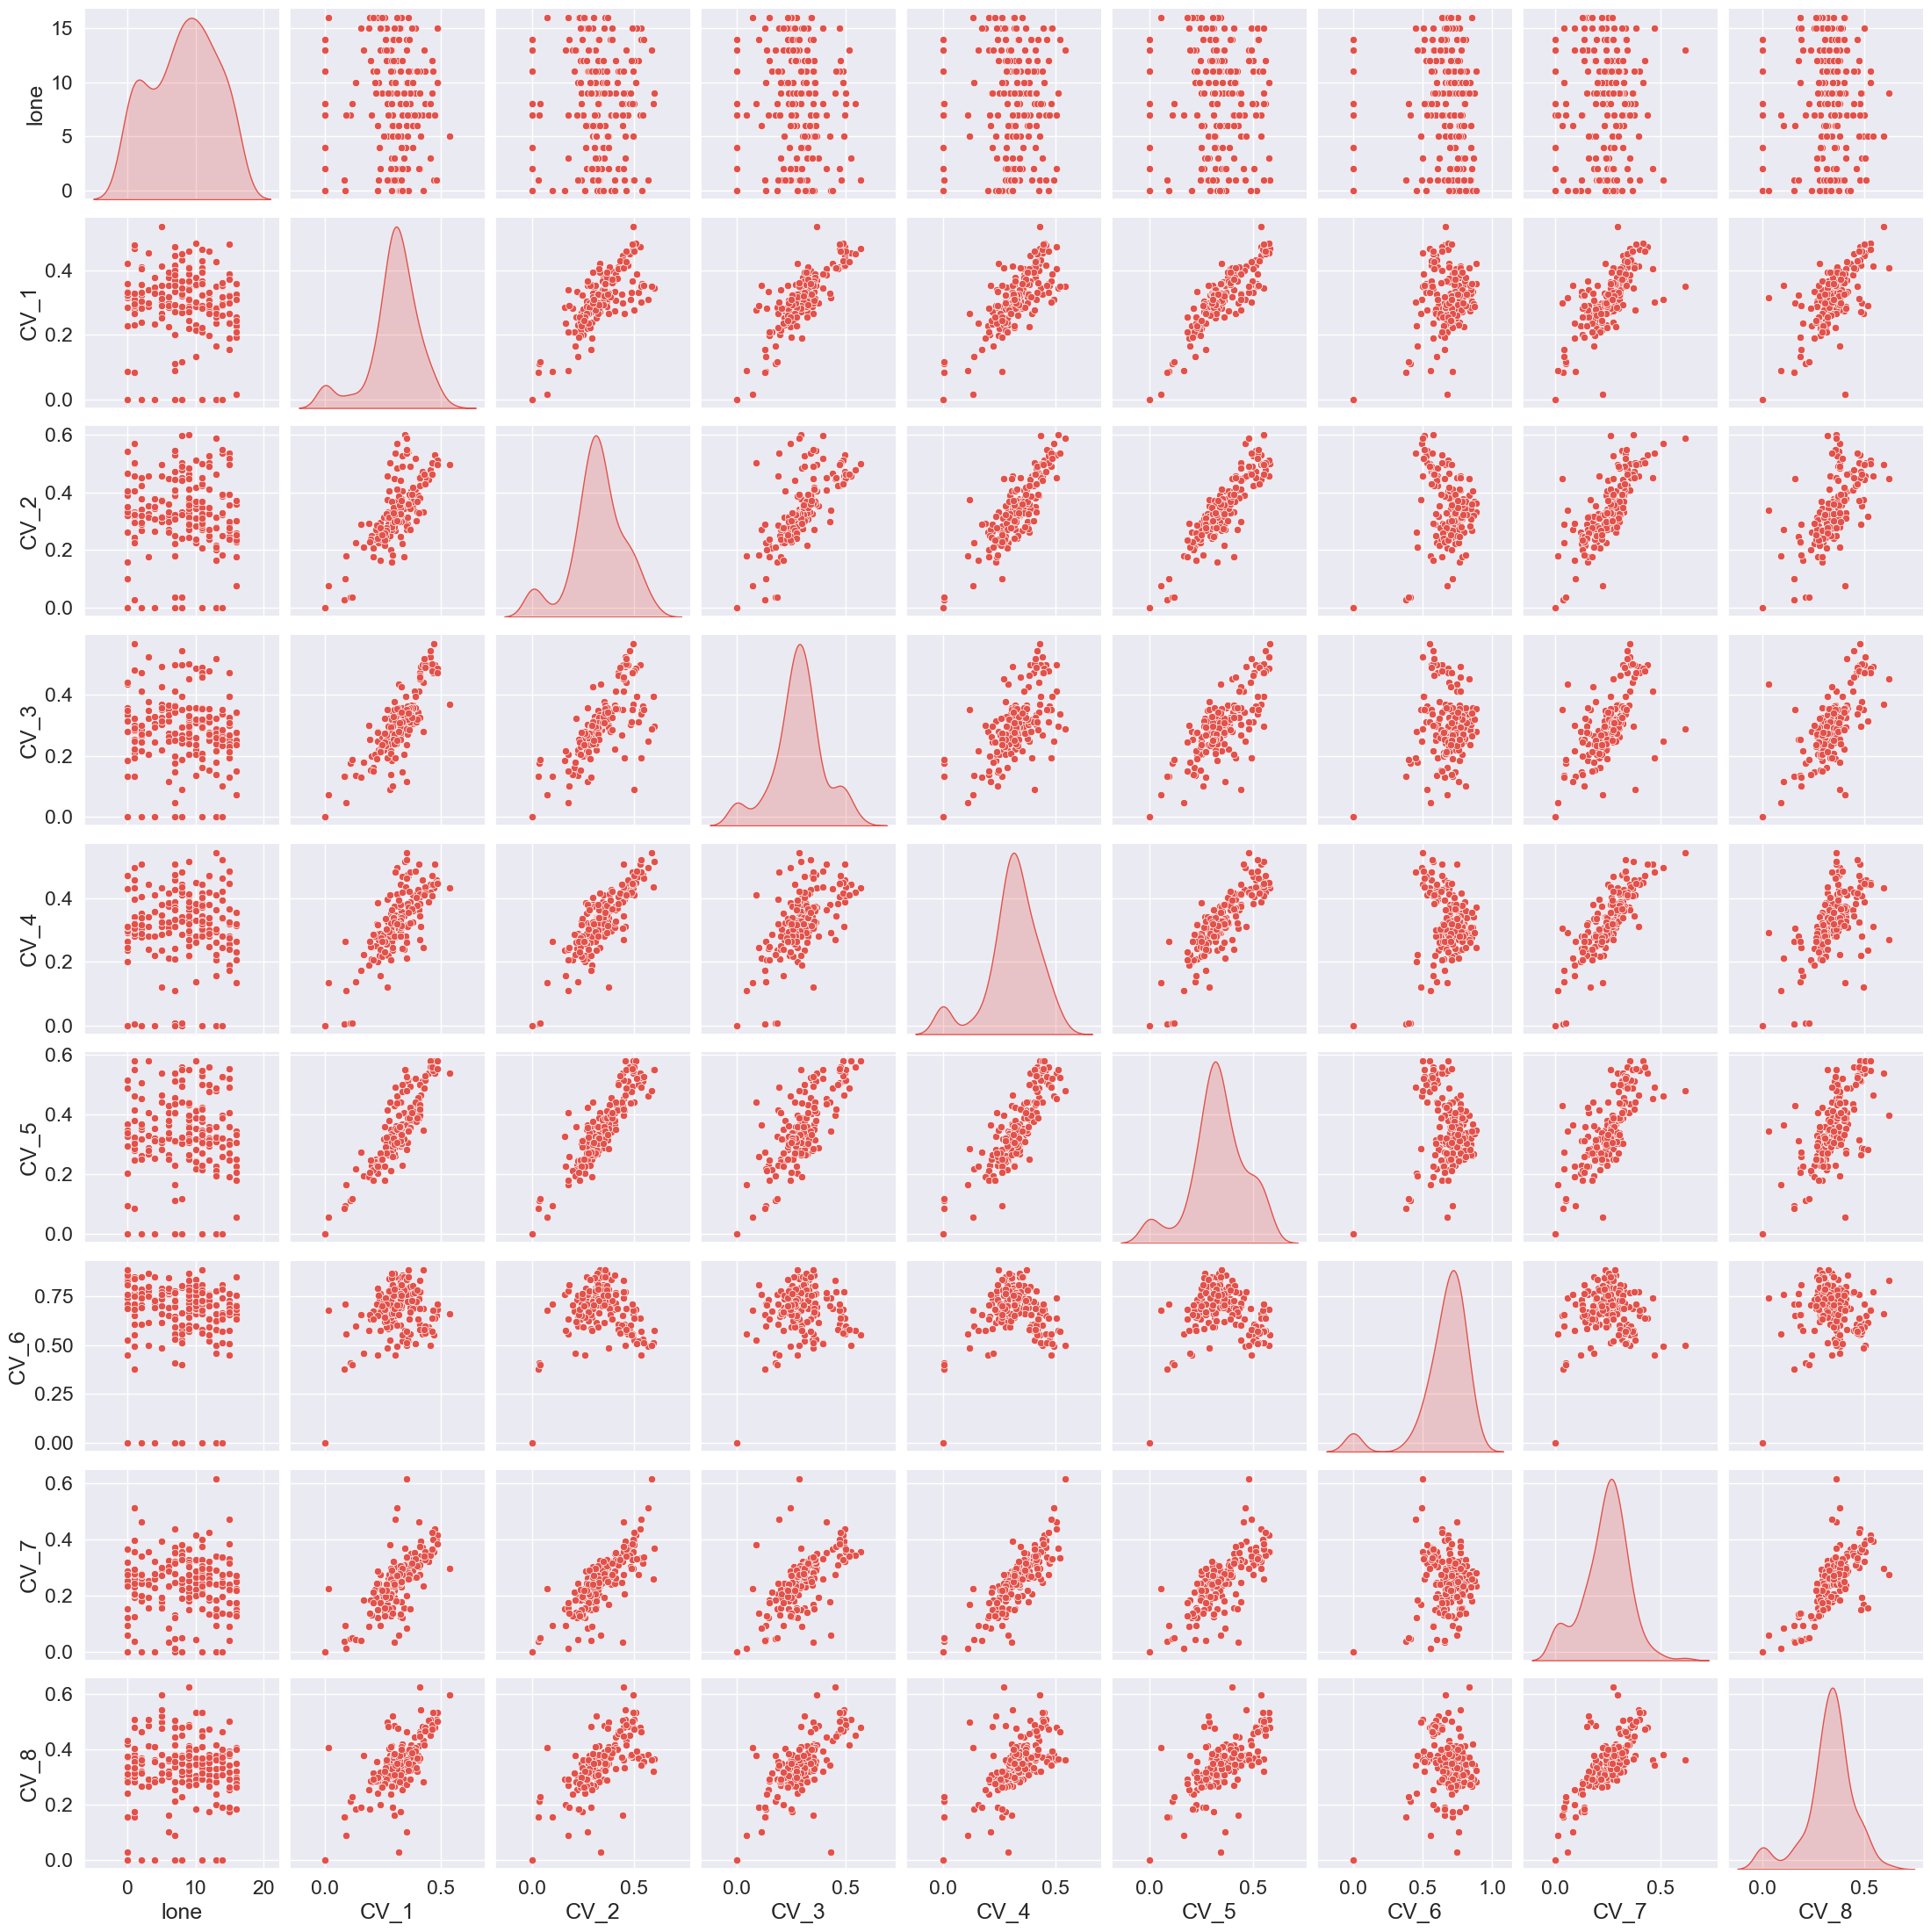

In [68]:
# Specifica la variabile dipendente (Y) e le variabili indipendenti (X)
variabile_dipendente = 'lone'
variabili_indipendenti = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8']

# Crea un dataframe contenente solo le variabili di interesse
df_subset = ad_data[[variabile_dipendente] + variabili_indipendenti]

# Crea una matrice di scatterplot
p=sns.pairplot(df_subset, diag_kind='kde', markers='o')

In [69]:
ad_data = ad_data.dropna(subset=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'lone'])

x = ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8']]
y = ad_data.lone

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [73]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.037526075733649855


In [74]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 5.797831350820262e-16


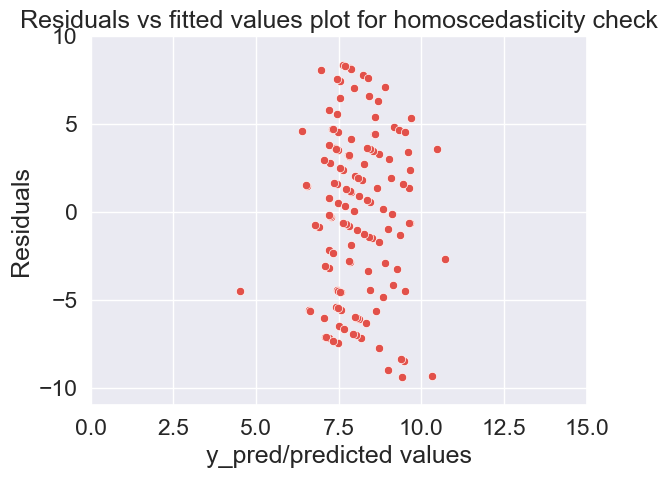

In [77]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-11,10)
plt.xlim(0,15)

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [78]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9240907800753231), ('p-value', 0.6234324310880468)]

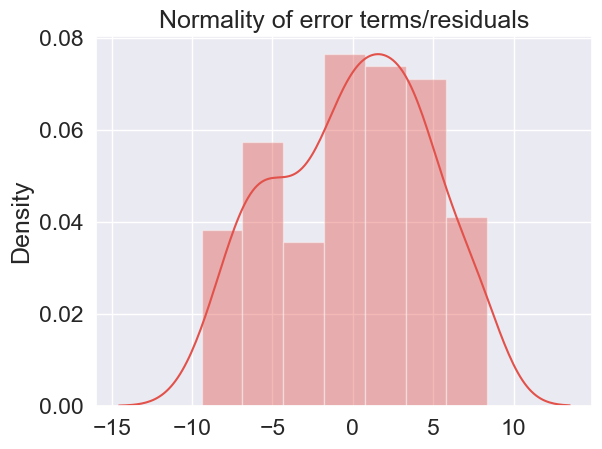

In [79]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

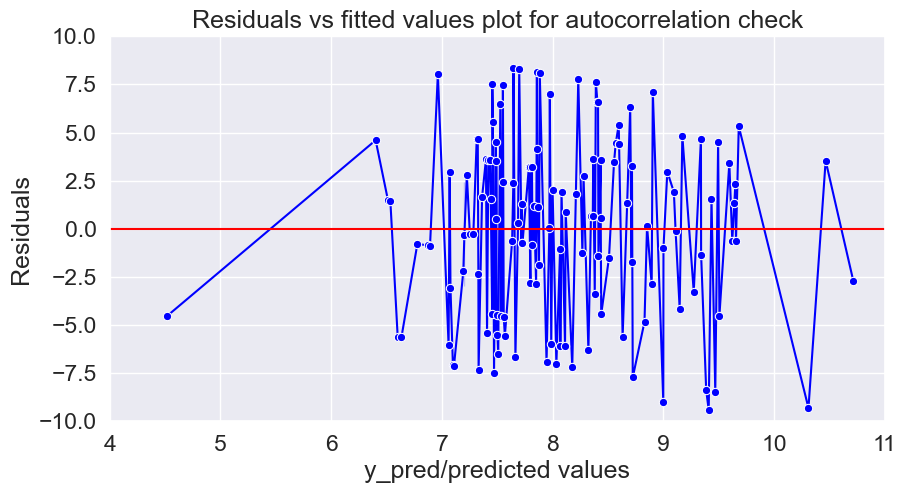

In [81]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(4,11)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

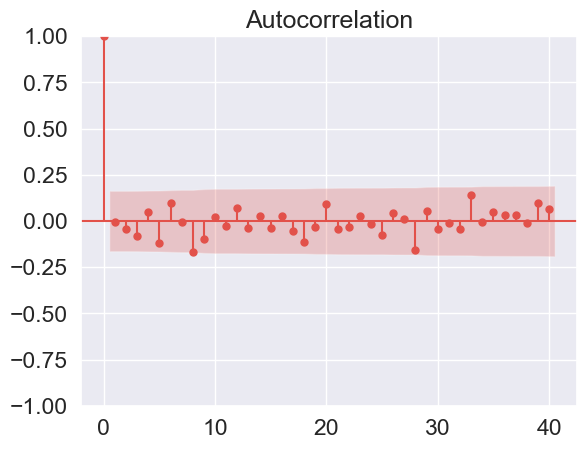

In [82]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

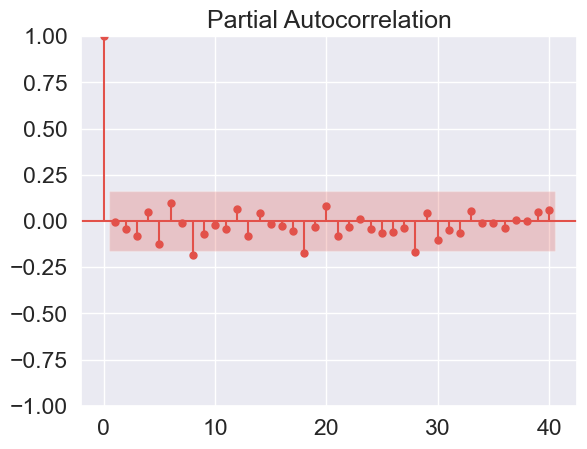

In [83]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

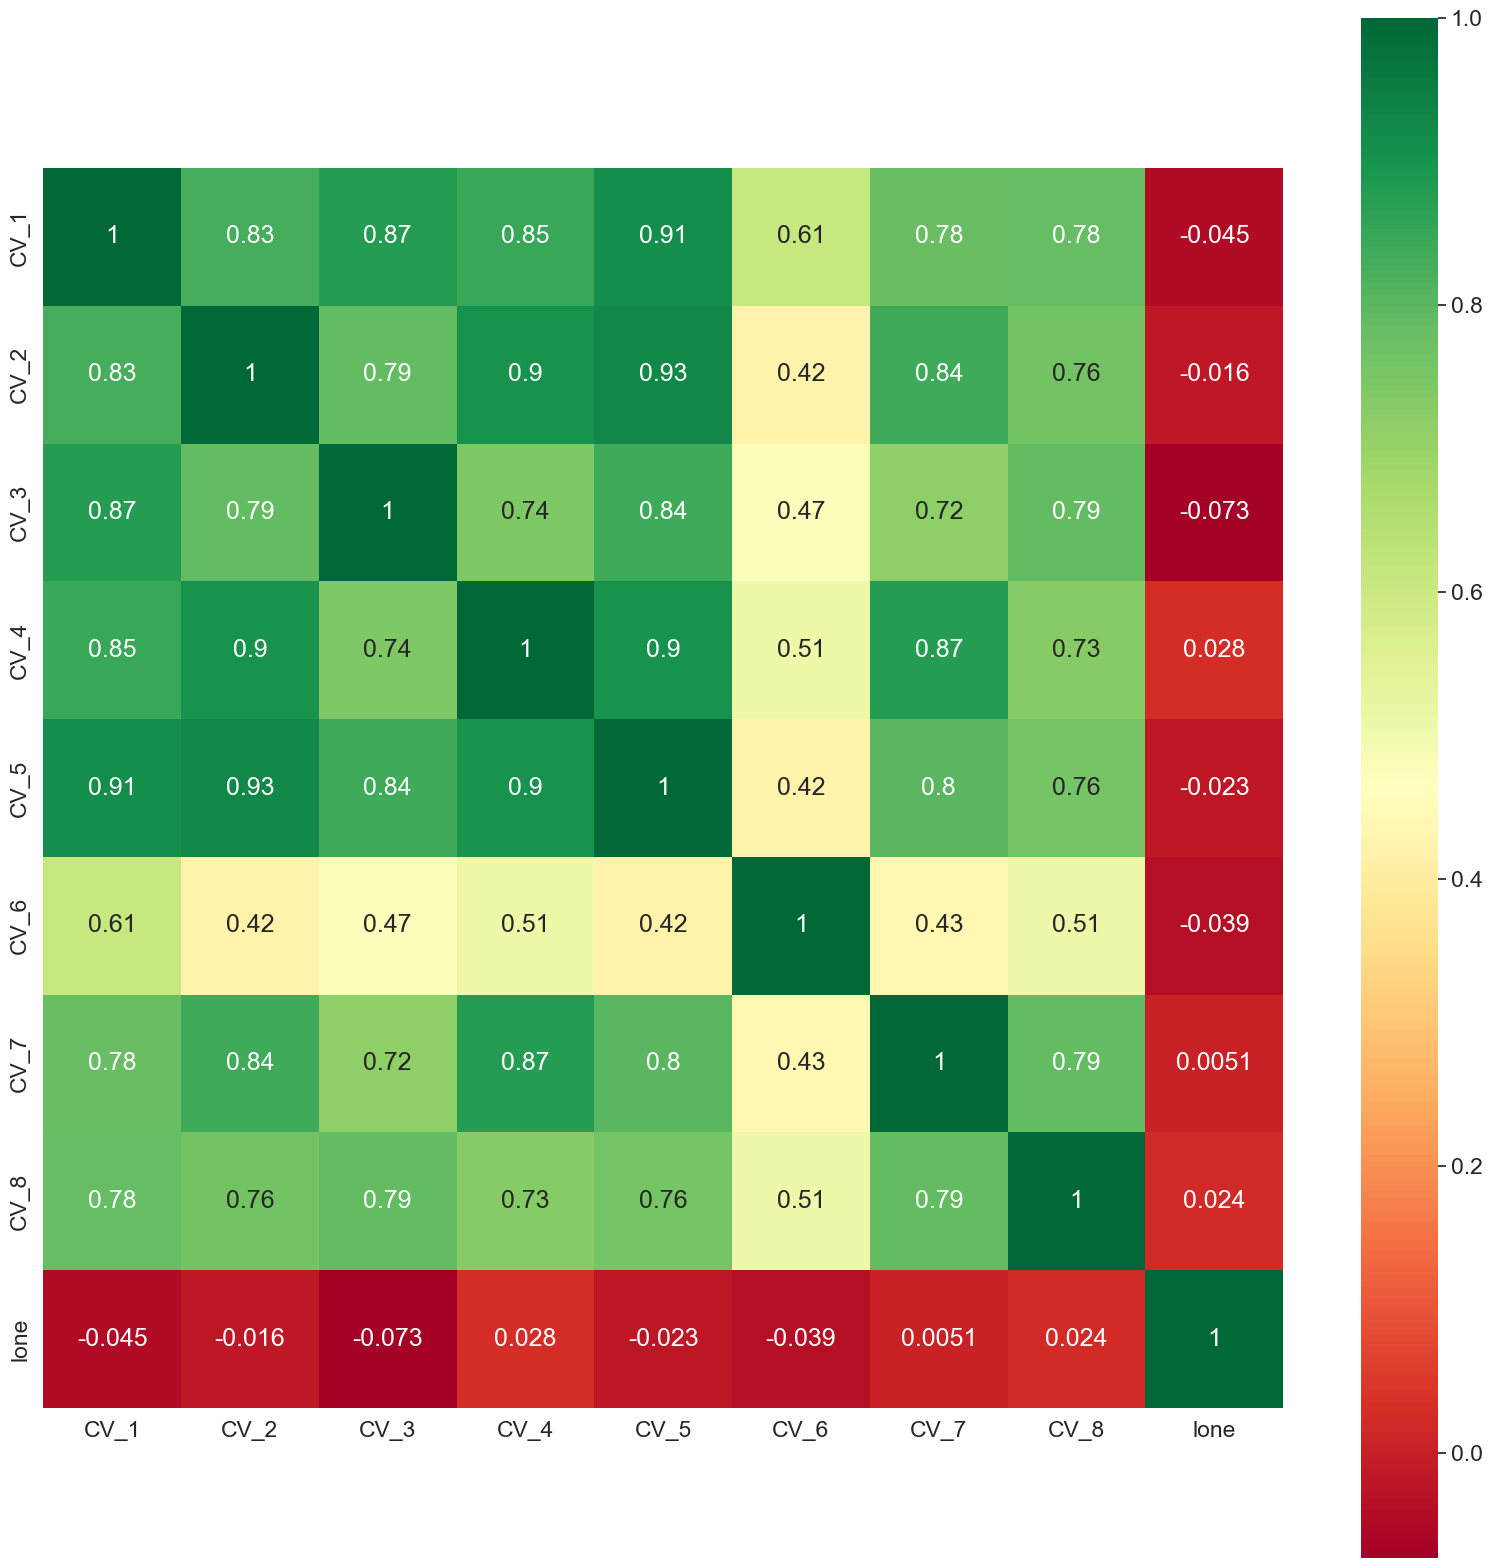

In [84]:
ad_data=ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8','lone']]
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [103]:
# Ora puoi ottenere i coefficienti della regressione
coefficients = regr.coef_
intercept = regr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.58096453 -0.05943144 -1.0543917   1.4919117  -0.06652619 -0.07852816
 -0.64575894  1.09899448]
Intercept: 8.014558421039444
